# Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Load Data From CSV File

In [92]:
heart_df = pd.read_csv('heart.csv')
heart_df.head(10)
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [15]:
feature_df = heart_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall' ]]
x = np.asarray(feature_df)
x[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [17]:
y = np.asarray(heart_df['output'])
y[0:5]

array([1, 1, 1, 1, 1])

# Train Test Split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 3)

# Modeling SVM

In [21]:
from sklearn import svm
from sklearn.metrics import f1_score

In [80]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    print(f'{kernel} F1 score: ', f1_score(y_test, yhat, average='weighted'))
    print(f'{kernel} Accuracy: ', metrics.accuracy_score(y_test, yhat))

linear F1 score:  0.9003798480607756
linear Accuracy:  0.9016393442622951
poly F1 score:  0.7343462614954017
poly Accuracy:  0.7377049180327869
rbf F1 score:  0.7490846108266609
rbf Accuracy:  0.7540983606557377
sigmoid F1 score:  0.5193962019152735
sigmoid Accuracy:  0.6557377049180327


# Confusion Matrix Func

In [125]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        # print('Confusion matrix, without normalization')
        # print(cm)
        pass
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Modeling Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

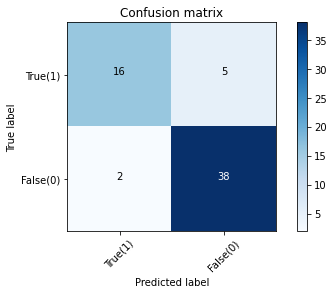

In [158]:
heartTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
heartTree.fit(x_train, y_train)
predtree = heartTree.predict(x_test)

# confusion matrix
cnf_matrix = confusion_matrix(y_test, predtree, labels=[0,1])
np.set_printoptions(precision=2)
    
plt.figure()
    
plot_confusion_matrix(cnf_matrix, classes=['True(1)','False(0)'],normalize= False,  title=f'Confusion matrix')

In [136]:
print(metrics.accuracy_score(y_test, predtree))

0.8852459016393442


# Modeling K-NN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

for K = 1 Accuracy is =  0.5573770491803278
for K = 2 Accuracy is =  0.5081967213114754
for K = 3 Accuracy is =  0.6065573770491803
for K = 4 Accuracy is =  0.5573770491803278
for K = 5 Accuracy is =  0.6557377049180327
for K = 6 Accuracy is =  0.6229508196721312
for K = 7 Accuracy is =  0.639344262295082
for K = 8 Accuracy is =  0.6229508196721312
for K = 9 Accuracy is =  0.6557377049180327
for K = 10 Accuracy is =  0.6557377049180327
for K = 11 Accuracy is =  0.6721311475409836
for K = 12 Accuracy is =  0.6557377049180327
for K = 13 Accuracy is =  0.6721311475409836
for K = 14 Accuracy is =  0.6229508196721312


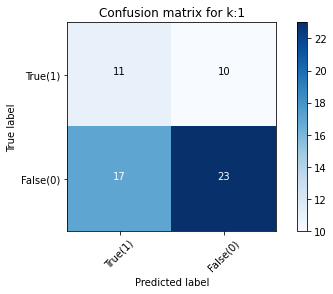

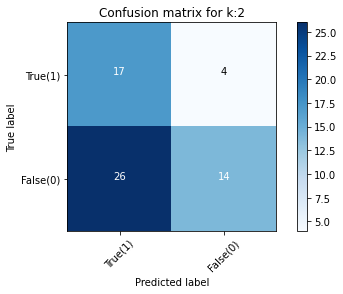

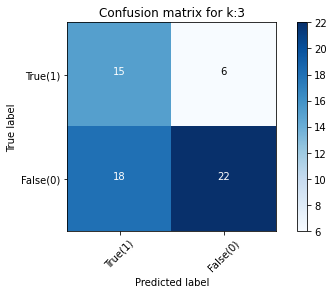

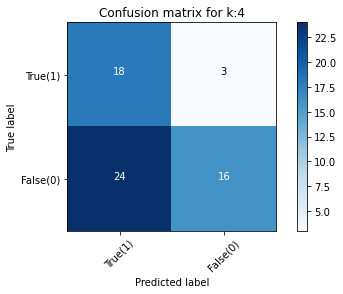

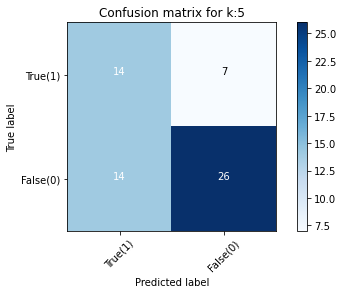

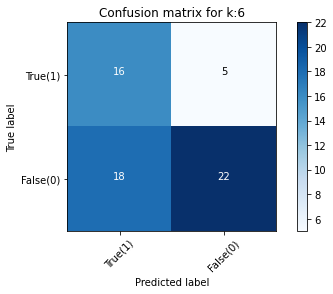

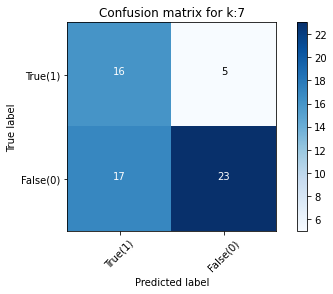

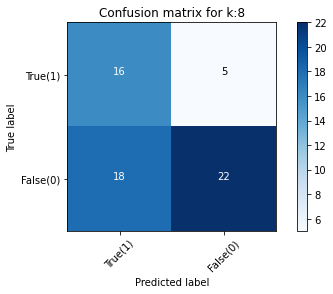

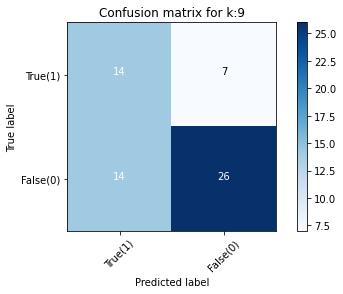

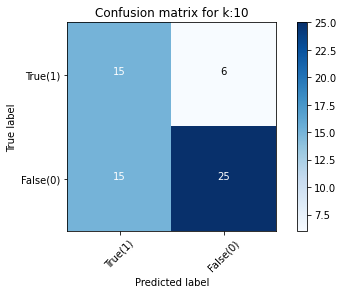

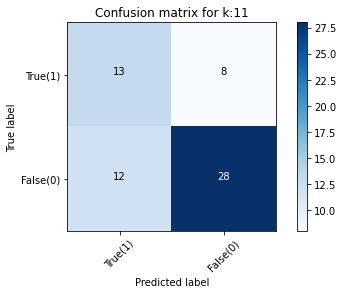

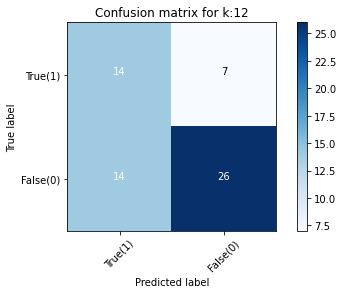

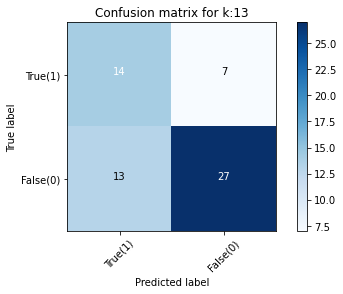

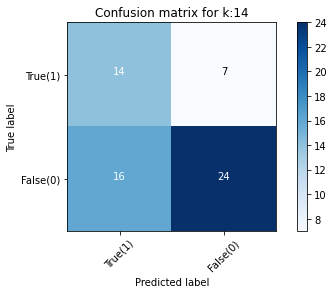

In [117]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n)
    neigh = neigh.fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    print(f'for K = {n} Accuracy is = ',metrics.accuracy_score(y_test, yhat))
    
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
    np.set_printoptions(precision=2)
    
    plt.figure()
    
    plot_confusion_matrix(cnf_matrix, classes=['True(1)','False(0)'],normalize= False,  title=f'Confusion matrix for k:{n}')

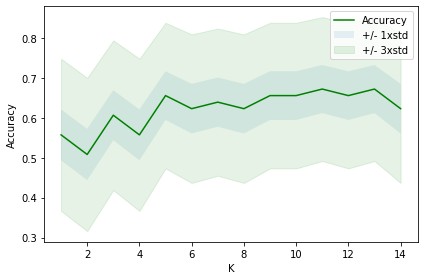

In [77]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.10, color = 'green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

# Modeling Logistic Reg

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score

In [94]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    for c in np.arange(0.1, 1.1, 0.1):
        LR = LogisticRegression(C = c, solver = solver, max_iter = 10000)
        LR = LR.fit(x_train, y_train)
        yhat = LR.predict(x_test)
        print(f'Jaccard for c:{c} and solver:{solver} is: ', jaccard_score(y_test, yhat, pos_label=0))
        print(f'Accuracy for c:{c} and solver:{solver} is: ',metrics.accuracy_score(y_test, yhat))

Jaccard for c:0.1 and solver:newton-cg is:  0.5833333333333334
Accuracy for c:0.1 and solver:newton-cg is:  0.8360655737704918
Jaccard for c:0.2 and solver:newton-cg is:  0.6521739130434783
Accuracy for c:0.2 and solver:newton-cg is:  0.8688524590163934
Jaccard for c:0.30000000000000004 and solver:newton-cg is:  0.6521739130434783
Accuracy for c:0.30000000000000004 and solver:newton-cg is:  0.8688524590163934
Jaccard for c:0.4 and solver:newton-cg is:  0.6521739130434783
Accuracy for c:0.4 and solver:newton-cg is:  0.8688524590163934
Jaccard for c:0.5 and solver:newton-cg is:  0.6956521739130435
Accuracy for c:0.5 and solver:newton-cg is:  0.8852459016393442
Jaccard for c:0.6 and solver:newton-cg is:  0.6956521739130435
Accuracy for c:0.6 and solver:newton-cg is:  0.8852459016393442
Jaccard for c:0.7000000000000001 and solver:newton-cg is:  0.6956521739130435
Accuracy for c:0.7000000000000001 and solver:newton-cg is:  0.8852459016393442
Jaccard for c:0.8 and solver:newton-cg is:  0.695